<a href="https://colab.research.google.com/github/PanciSaigo/DeepLearningRookie/blob/main/Overfitting_and_Regularisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Neural Networks and Deep Learning

---

## Lecture 2: Overfitting and Regularisation

### 🌐 Connect Colab to Google Drive

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My Drive/[2024-2025] AN2DL/Lecture 2

### ⚙️ Import Libraries

In [ ]:
# Fix randomness and hide warnings
seed = 42

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['MPLCONFIGDIR'] = os.getcwd()+'/configs/'

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

import numpy as np
np.random.seed(seed)

import logging

import random
random.seed(seed)

# Import tensorflow
import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl
tf.autograph.set_verbosity(0)
tf.get_logger().setLevel(logging.ERROR)
tf.random.set_seed(seed)
print(f"TensorFlow version {tf.__version__}")

# Import other libraries
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.rc('font', size=14)
%matplotlib inline
import seaborn as sns
sns.set(font_scale=1.4)
sns.set_style('white')
from pandas.plotting import scatter_matrix
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error

### ⏳ Load Data

In [ ]:
# Load the California Housing dataset into a variable called 'data'
data = fetch_california_housing(as_frame=True)

# Print the description of the California Housing dataset
print(data.DESCR)

<img src="https://i0.wp.com/studentwork.prattsi.org/infovis/wp-content/uploads/sites/3/2021/05/final-1.png?w=1364&ssl=1" width="900">

### 🔎 Inspect Data

In [ ]:
# Create a DataFrame 'housing_dataset' from the California Housing dataset
housing_dataset = data.frame
print('California Housing dataset shape', housing_dataset.shape)

# Display the first 10 rows of the California Housing dataset
housing_dataset.head(10)

In [ ]:
# Print the shape of the California Housing dataset
print('California Housing dataset shape', housing_dataset.shape)

# Generate summary statistics for the California Housing dataset
housing_dataset.describe()

In [ ]:
# Set Seaborn theme with white grid style
sns.set_theme(style="whitegrid")

# Define a harmonious colour palette
palette = sns.color_palette("viridis", n_colors=9)

# Generate the figure and axes for subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 10), sharex=False, sharey='row')

# Flatten the axes array for easier access
axes = axes.flatten()

# List the columns of the dataset
columns = housing_dataset.columns

# Create histograms with customised colours for each feature
for i, column in enumerate(columns):
    if i < len(axes):  # Ensure the number of subplots is not exceeded
        sns.histplot(
            data=housing_dataset,
            x=column,
            kde=True,
            ax=axes[i],
            color=palette[i],
            edgecolor='white',
            alpha=0.7
        )
        axes[i].set_title(column.capitalize(), fontsize=14, fontweight='bold', color='#333333')
        axes[i].set_xlabel('')  # Remove x-axis labels for all subplots
        if i % 3 != 0:
            axes[i].set_ylabel('')  # Remove y-axis labels except for the first column
        axes[i].tick_params(axis='both', which='major', labelsize=10)

        # Improve label readability by limiting the number of ticks
        axes[i].xaxis.set_major_locator(ticker.MaxNLocator(6))
        axes[i].yaxis.set_major_locator(ticker.MaxNLocator(6))

# Remove any extra subplots not used
for i in range(len(columns), len(axes)):
    fig.delaxes(axes[i])

# Enhance layout with proper padding
plt.tight_layout(pad=3.0, h_pad=2.5, w_pad=2.0)

# Add a general title with spacing at the top
fig.suptitle('Distribution of Housing Dataset Features', fontsize=20, fontweight='bold', y=1.02, color='#444444')

# Display the plot
plt.show()

In [ ]:
housing_dataset.plot(
    kind="scatter",
    x="Longitude",
    y="Latitude",
    c="MedHouseVal",
    cmap="jet",
    colorbar=True,
    legend=True,
    sharex=False,
    figsize=(10,7),
    s=housing_dataset['Population']/100,
    label="Population",
    alpha=0.7
    )
plt.show()

#### Split in train, validation and test

In [ ]:
features = housing_dataset.columns[:-1]
target = housing_dataset.columns[-1]

# Split the dataset into a combined training and validation set, and a separate test set
X_train_val, X_test, y_train_val, y_test = train_test_split(
    housing_dataset[features],
    housing_dataset[target],
    test_size = 0.1,
    random_state=seed
)

# Further split the combined training and validation set into a training set and a validation set
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val,
    y_train_val,
    test_size = len(X_test), # Ensure validation set size matches test set size
    random_state=seed
)

# Print the shapes of the resulting sets
print('Training set shape:\t', X_train.shape, y_train.shape)
print('Validation set shape:\t', X_val.shape, y_val.shape)
print('Test set shape:\t\t', X_test.shape, y_test.shape)

### 🔄 Process Data

In [ ]:
# Compute maximum values for each feature
max_df = X_train.max()

# Display maximum values
print('California Housing dataset maximum values')
print(max_df)

# Compute maximum values for each feature
max_target = y_train.max()

# Display maximum values
print('California Housing target maximum values')
print(max_target)

# Compute minimum values for each feature
min_df = X_train.min()

# Display minimum values
print('\nCalifornia Housing dataset minimum values')
print(min_df)

# Compute minimum values for each feature
min_target = y_train.min()

# Display minimum values
print('California Housing target minimum values')
print(min_target)

In [ ]:
# Normalise the dataset splits in the range [0,1]
X_train_val = (X_train_val - min_df) / (max_df - min_df)
X_train = (X_train - min_df)/(max_df - min_df)
X_val = (X_val - min_df)/(max_df - min_df)
X_test = (X_test - min_df)/(max_df - min_df)

# Normalise the dataset splits in the range [0,1]
y_train_val = (y_train_val - min_target) / (max_target - min_target)
y_train = (y_train - min_target)/(max_target - min_target)
y_val = (y_val - min_target)/(max_target - min_target)
y_test = (y_test - min_target)/(max_target - min_target)

In [ ]:
# Inspect the effects of data normalisation
X_train.describe()

### 🧮 Define Network Parameters

In [ ]:
# Define the input shape for the neural network, excluding the batch size
input_shape = X_train.shape[1:]

# Define the batch size for training
batch_size = 64

# Define the number of training epochs
epochs = 1000

# Create an empty dictionary to store metadata
metadata = {}

### 🧙‍♂️ Auxiliary functions

In [ ]:
# Define a function for plotting training and validation Mean Squared Error (MSE) histories.
def plot_histories(metadata, training=False, baseline=False, show_all=False):

    print('VALIDATION MSE')
    plt.figure(figsize=(21, 9))

    # Iterate through different models stored in metadata.
    for model in list(metadata.keys()):

        # Skip the baseline model if baseline flag is False.
        if model == 'Baseline' and not baseline:
            continue

        # Retrieve relevant information from the metadata dictionary.
        history = metadata[model]['history']
        patience = metadata[model]['patience']
        color = metadata[model]['color']
        val_score = metadata[model]['val_score']
        print('%s: %.4f' % (model, val_score))

        # Plot training and validation MSE histories with or without patience handling.
        if patience != 0:
            if training:
                plt.plot(
                    history['mse'][:-patience],
                    alpha=0.5,
                    color=color
                )
                if show_all:
                    plt.plot(
                        np.arange(len(history['mse']) - patience - 1, len(history['mse'])),
                        history['mse'][-patience - 1:],
                        alpha=0.2,
                        color=color
                    )

            plt.plot(
                history['val_mse'][:-patience],
                label=model,
                alpha=0.9,
                color=color
            )
            if show_all:
                plt.plot(
                    np.arange(len(history['val_mse']) - patience - 1, len(history['val_mse'])),
                    history['val_mse'][-patience - 1:],
                    alpha=0.2,
                    color=color
                )

        else:
            if training:
                plt.plot(
                    history['mse'],
                    alpha=0.5,
                    color=color
                )
            plt.plot(
                history['val_mse'],
                label=model,
                alpha=0.9,
                color=color
            )

        # Set y-axis limits and add labels, legends, and grid.
        if training:
            plt.ylim(0.004, 0.0225)
        else:
            plt.ylim(0.01, 0.025)
        plt.title('Mean Squared Error')
        plt.legend(loc='upper right')
        plt.grid(alpha=0.3)

    # Display the plot.
    plt.show()

In [ ]:
# Define a function for plotting residuals and model predictions
def plot_residuals(model, data, labels):
    # Sort the data and labels based on the 'labels' column
    data['sort'] = labels
    data = data.sort_values(by=['sort'])
    labels = np.expand_dims(data['sort'], 1)
    data.drop(['sort'], axis=1, inplace=True)

    # Make predictions using the model
    y_pred = model.predict(data, verbose=0)

    # Calculate squared errors and mean squared error (MSE)
    squared_errors = (labels - y_pred)**2
    mse = np.mean(squared_errors).astype('float32')
    print('MSE: %.4f' % mse)

    # Set up plotting styles and create a scatter plot
    mpl.rcParams.update(mpl.rcParamsDefault)
    sns.set(font_scale=1.1, style=None, palette='Set1')
    plt.figure(figsize=(21, 5))

    # Plot true labels in red and model predictions in blue
    plt.scatter(np.arange(len(labels)), labels, label='True', color='#d62728', alpha=0.7, s=8)

    # Add vertical lines to represent residuals
    for i in range(len(labels)):
        if labels[i] >= y_pred[i]:
            plt.vlines(i, y_pred[i], labels[i], alpha=0.2, linewidth=0.5)
        else:
            plt.vlines(i, labels[i], y_pred[i], alpha=0.2, linewidth=0.5)

    plt.scatter(np.arange(len(y_pred)), y_pred, label='Prediction', color='#1f77b4', s=8)

    # Add legends, grid, and set y-axis limits
    plt.legend()
    plt.grid(alpha=0.3)
    plt.ylim((-0.1, 1.1))
    plt.show()

In [ ]:
def evaluate_and_plot_model(model, X_val, y_val, X_test, y_test, metadata, history, patience, model_name, color, plot_baseline=False):
    # Calculate validation Mean Squared Error (MSE) for the model
    val_predictions = np.squeeze(model.predict(X_val, verbose=0))
    val_squared_errors = (y_val - val_predictions)**2
    val_mse = np.mean(val_squared_errors).astype('float32')

    # Calculate test Mean Squared Error (MSE) for the model
    test_predictions = np.squeeze(model.predict(X_test, verbose=0))
    test_squared_errors = (y_test - test_predictions)**2
    test_mse = np.mean(test_squared_errors).astype('float32')

    # Add model metadata to the dictionary
    metadata[model_name] = {
        'model': model,
        'history': history,
        'color': color,
        'patience': patience,
        'val_score': val_mse,
        'test_score': test_mse
    }

    # Plot histories
    plot_histories(metadata, baseline=plot_baseline)

    return metadata

## 🦾 Baseline

### 🛠️ Build the model

In [ ]:
def build_model(input_shape, learning_rate=1e-3, l2_lambda=0, dropout_rate=0, name='', seed=seed):

    # Set random seed for reproducibility
    tf.random.set_seed(seed)

    # Initialise weights and regulariser
    initialiser = tfk.initializers.GlorotNormal(seed=seed)
    regulariser = tfk.regularizers.l2(l2_lambda)

    # Input layer
    input_layer = tfkl.Input(shape=input_shape, name='Input')

    # Hidden layers with ReLU activations
    x = tfkl.Dense(units=256, name='HiddenDense1', kernel_initializer=initialiser)(input_layer)
    x = tfkl.Activation('relu', name='HiddenActivation1')(x)
    x = tfkl.Dense(units=256, name='HiddenDense2', kernel_initializer=initialiser)(x)
    x = tfkl.Activation('relu', name='HiddenActivation2')(x)

    # Dropout layer if specified
    if dropout_rate > 0:
        x = tfkl.Dropout(dropout_rate, seed=seed, name='Dropout')(x)

    # Output layer with optional L2 regularisation
    if l2_lambda > 0:
        output_layer = tfkl.Dense(units=1, kernel_initializer=initialiser, kernel_regularizer=regulariser, name='Output')(x)
    else:
        output_layer = tfkl.Dense(units=1, kernel_initializer=initialiser, name='Output')(x)

    # Linear output activation
    output_activation = tfkl.Activation('linear', name='OutputActivation')(output_layer)

    # Connect input and output through the Model class
    model = tfk.Model(inputs=input_layer, outputs=output_activation, name=name)

    # Compile the model with Adam optimiser and MSE loss
    opt = tfk.optimizers.Adam(learning_rate)
    loss = tfk.losses.MeanSquaredError()
    mtr = ['mse']
    model.compile(loss=loss, optimizer=opt, metrics=mtr)

    # Return the compiled model
    return model

In [ ]:
model = build_model(input_shape)
model.summary(expand_nested=True, show_trainable=True)
tfk.utils.plot_model(model, expand_nested=True, show_trainable=True, show_shapes=True, dpi=70)

### 🧠 Train the model

In [ ]:
# Train the model and store the training history
history = model.fit(
    x = X_train,
    y = y_train,
    validation_data = (X_val, y_val),
    batch_size = batch_size,
    epochs = epochs,
    verbose=0
).history

In [ ]:
# Set the number of initial data points to ignore
ignore = 0

# Create a figure for loss visualization
plt.figure(figsize=(21, 4))

# Plot training and validation loss
plt.plot(history['loss'][ignore:], label='Training loss', alpha=.2, color='#1f77b4')
plt.plot(history['val_loss'][ignore:], label='Validation loss', alpha=.8, color='#1f77b4')
plt.title('Loss')
plt.legend()
plt.grid(alpha=.3)

# Create a figure for Mean Squared Error visualization
plt.figure(figsize=(21, 4))

# Plot training and validation MSE
plt.plot(history['mse'][ignore:], label='Training MSE', alpha=.2, color='#1f77b4')
plt.plot(history['val_mse'][ignore:], label='Validation MSE', alpha=.8, color='#1f77b4')
plt.title('Mean Squared Error')
plt.legend()
plt.grid(alpha=.3)

# Display the plots
plt.show()

In [ ]:
metadata = evaluate_and_plot_model(
    model,
    X_val,
    y_val,
    X_test,
    y_test,
    metadata,
    history=history,
    patience=0,
    model_name='Baseline',
    color='#1f77b4',
    plot_baseline=True
    )

# Calculate the final validation mse
final_val_mse = round(history['val_mse'][-1], 4)

# Save the trained model to a file with the mse included in the filename
model_filename = f'Feedforward_{final_val_mse}.keras'
model.save(model_filename)

# Delete the model to free up memory resources
del model

## 🦾 Early Stopping

Assuming the goal of a training is to minimize the loss.

With this, the metric to be monitored would be **val_loss**, and mode would be **min**.

A model.fit() training loop will check at end of every epoch whether the val_loss is no longer decreasing, considering the **min_delta** and **patience** if applicable.

```
tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=0,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)
```



### 🛠️ Build the model

In [ ]:
es_model = build_model(input_shape)
es_model.summary(expand_nested=True, show_trainable=True)
tfk.utils.plot_model(es_model, expand_nested=True, show_trainable=True, show_shapes=True, dpi=70)

### 🧠 Train the model

In [ ]:
# Define the patience value for early stopping
patience = 100

# Create an EarlyStopping callback
early_stopping = tfk.callbacks.EarlyStopping(
    monitor='val_mse',
    mode='min',
    patience=patience,
    restore_best_weights=True
)

# Store the callback in a list
callbacks = [early_stopping]

In [ ]:
# Train the model and store the training history
es_history = es_model.fit(
    x = X_train,
    y = y_train,
    validation_data = (X_val, y_val),
    batch_size = batch_size,
    epochs = epochs,
    callbacks = callbacks
).history

In [ ]:
# Set the number of initial data points to ignore
ignore = 0

# Create a figure for loss visualization
plt.figure(figsize=(21, 4))

# Plot training and validation loss for early-stopped model
plt.plot(es_history['loss'][ignore:], label='Training loss', alpha=.2, color='#ff7f0e')
plt.plot(es_history['val_loss'][ignore:], label='Validation loss', alpha=.8, color='#ff7f0e')
plt.title('Loss')
plt.legend()
plt.grid(alpha=.3)

# Create a figure for Mean Squared Error visualization
plt.figure(figsize=(21, 4))

# Plot training and validation MSE for early-stopped model
plt.plot(es_history['mse'][ignore:], label='Training MSE', alpha=.2, color='#ff7f0e')
plt.plot(es_history['val_mse'][ignore:], label='Validation MSE', alpha=.8, color='#ff7f0e')
plt.title('Mean Squared Error')
plt.legend()
plt.grid(alpha=.3)

# Display the plots
plt.show()

In [ ]:
metadata = evaluate_and_plot_model(
    es_model,
    X_val,
    y_val,
    X_test,
    y_test,
    metadata,
    history=es_history,
    patience=patience,
    model_name='Baseline (es)',
    color='#ff7f0e',
    plot_baseline=True
    )


# Calculate the final validation mse
final_val_mse = round(es_history['val_mse'][-(patience+1)], 4)
print(final_val_mse)

# Save the trained model to a file with the mse included in the filename
es_model_filename = f'Feedforward_es_{final_val_mse}.keras'
es_model.save(es_model_filename)

# Delete the model to free up memory resources
del es_model

In [ ]:
plot_histories(metadata, baseline=False)

## 🦾 Ridge regression

$$\mathrm{Ridge} (y, \hat{y}) = \frac{1}{N} \sum^N_{n=0} (y_n - g(x_n|w))^2 + \lambda\sum^K_{k=0}w_k^2 = \mathrm{MSE} (y, \hat{y}) + \lambda||w||_2^2
$$

### 🛠️ Build the model

In [ ]:
l2_lambda = 5e-4

l2_model = build_model(input_shape, l2_lambda=l2_lambda)
l2_model.summary(expand_nested=True, show_trainable=True)
tfk.utils.plot_model(l2_model, expand_nested=True, show_trainable=True, show_shapes=True, dpi=70)

### 🧠 Train the model

In [ ]:
# Create an EarlyStopping callback
early_stopping = tfk.callbacks.EarlyStopping(
    monitor='val_mse',
    mode='min',
    patience=patience,
    restore_best_weights=True
)

# Store the callback in a list
callbacks = [early_stopping]

In [ ]:
# Train the model and store the training history
l2_history = l2_model.fit(
    x = X_train,
    y = y_train,
    validation_data = (X_val, y_val),
    batch_size = batch_size,
    epochs = epochs,
    callbacks = callbacks
).history

In [ ]:
# Set the number of initial data points to ignore
ignore = 0

# Create a figure for loss visualization
plt.figure(figsize=(21, 4))

# Plot training and validation loss for L2-regularized model
plt.plot(l2_history['loss'][ignore:], label='Training loss', alpha=.2, color='#2ca02c')
plt.plot(l2_history['val_loss'][ignore:], label='Validation loss', alpha=.8, color='#2ca02c')
plt.title('Loss')
plt.legend()
plt.grid(alpha=.3)

# Create a figure for Mean Squared Error visualization
plt.figure(figsize=(21, 4))

# Plot training and validation MSE for L2-regularized model
plt.plot(l2_history['mse'][ignore:], label='Training MSE', alpha=.2, color='#2ca02c')
plt.plot(l2_history['val_mse'][ignore:], label='Validation MSE', alpha=.8, color='#2ca02c')
plt.title('Mean Squared Error')
plt.legend()
plt.grid(alpha=.3)

# Display the plots
plt.show()

In [ ]:
metadata = evaluate_and_plot_model(
    l2_model,
    X_val,
    y_val,
    X_test,
    y_test,
    metadata,
    history=l2_history,
    patience=patience,
    model_name='Ridge',
    color='#2ca02c'
    )

# Calculate the final validation mse
final_val_mse = round(l2_history['val_mse'][-(patience+1)], 4)

# Save the trained model to a file with the mse included in the filename
l2_model_filename = f'Feedforward_l2_{final_val_mse}.keras'
l2_model.save(l2_model_filename)

# Delete the model to free up memory resources
del l2_model

## 🦾 Dropout

The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting. Inputs not set to 0 are scaled up by 1/(1 - rate) such that the sum over all inputs is unchanged.

Note that the Dropout layer only applies when training is set to True such that no values are dropped during inference.



```
tf.keras.layers.Dropout(
    rate,
    noise_shape=None,
    seed=None,
    **kwargs
)
```



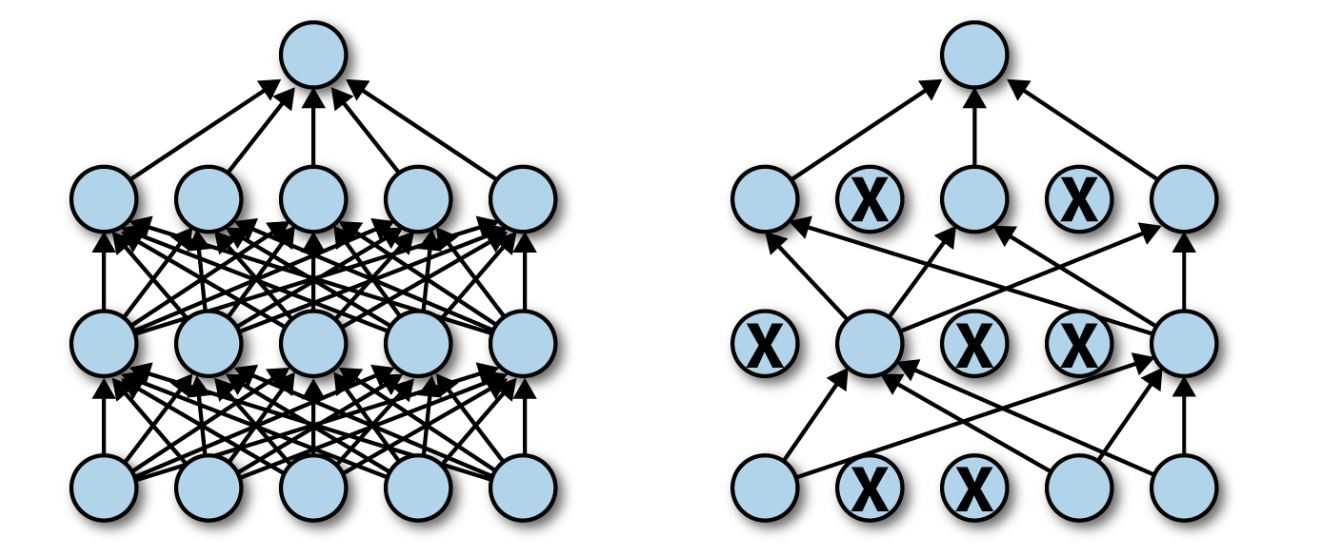

### 🛠️ Build the model

In [ ]:
dropout_rate = 1/2

dropout_model = build_model(input_shape, dropout_rate=dropout_rate)
dropout_model.summary(expand_nested=True, show_trainable=True)
tfk.utils.plot_model(dropout_model, expand_nested=True, show_trainable=True, show_shapes=True, dpi=70)

### 🧠 Train the model

In [ ]:
# Create an EarlyStopping callback
early_stopping = tfk.callbacks.EarlyStopping(
    monitor='val_mse',
    mode='min',
    patience=patience,
    restore_best_weights=True
)

callbacks = [early_stopping]

dropout_history = dropout_model.fit(
    x = X_train,
    y = y_train,
    validation_data = (X_val, y_val),
    batch_size = batch_size,
    epochs = epochs,
    callbacks = callbacks
).history

In [ ]:
# Set the number of initial data points to ignore
ignore = 0

# Create a figure for loss visualization
plt.figure(figsize=(21, 4))

# Plot training and validation loss for model with dropout layers
plt.plot(dropout_history['loss'][ignore:], label='Training loss', alpha=.2, color='#9467bd')
plt.plot(dropout_history['val_loss'][ignore:], label='Validation loss', alpha=.8, color='#9467bd')
plt.title('Loss')
plt.legend()
plt.grid(alpha=.3)

# Create a figure for Mean Squared Error visualization
plt.figure(figsize=(21, 4))

# Plot training and validation MSE for model with dropout layers
plt.plot(dropout_history['mse'][ignore:], label='Training MSE', alpha=.2, color='#9467bd')
plt.plot(dropout_history['val_mse'][ignore:], label='Validation MSE', alpha=.8, color='#9467bd')
plt.title('Mean Squared Error')
plt.legend()
plt.grid(alpha=.3)

# Display the plots
plt.show()

In [ ]:
metadata = evaluate_and_plot_model(
    dropout_model,
    X_val,
    y_val,
    X_test,
    y_test,
    metadata,
    history=dropout_history,
    patience=patience,
    model_name='Dropout',
    color='#9467bd'
    )


# Calculate the final validation mse
final_val_mse = round(dropout_history['val_mse'][-(patience+1)], 4)

# Save the trained model to a file with the mse included in the filename
dropout_model_filename = f'Feedforward_do_{final_val_mse}.keras'
dropout_model.save(dropout_model_filename)

# Delete the model to free up memory resources
del dropout_model

## 📊 Final Comparison

In [ ]:
# Compare all the trainings
plot_histories(metadata, baseline=True)

In [ ]:
# Create a bar chart for validation MSE of different models
plt.figure(figsize=(21, 6))
for m in metadata.keys():
    plt.bar(m, metadata[m]['val_score'], color=metadata[m]['color'], alpha=.8)
plt.ylim(0.01, .02)
plt.title('Validation MSE')
plt.grid(alpha=.3, axis='y')
plt.show()

## 🕹️ Use the Model - Make Inference

In [ ]:
# Load the best model
print('Best model loading...')
dropout_model = tfk.models.load_model('Feedforward_do_0.0105.keras')
print('Best model loaded!')

# Evaluate and plot performance on the training data
print('Train Performance')
plot_residuals(dropout_model, X_train.copy(), y_train.copy())

# Evaluate and plot performance on the validation data
print('Validation Performance')
plot_residuals(dropout_model, X_val.copy(), y_val.copy())

# Evaluate and plot performance on the test data
print('Test Performance')
plot_residuals(dropout_model, X_test.copy(), y_test.copy())

## 💡 K-Fold Cross-Validation

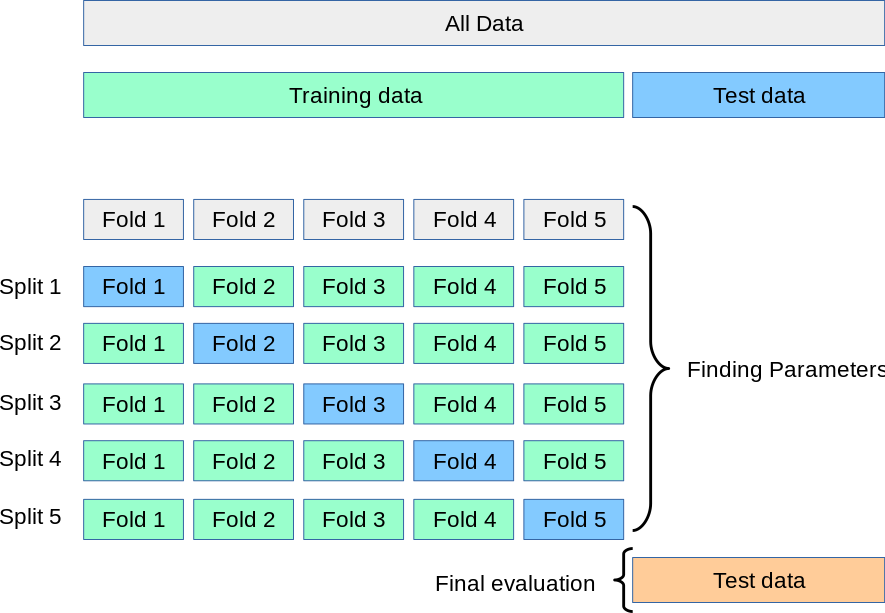

In [ ]:
# Define the number of folds for cross-validation
num_folds = 10

# Initialize lists to store training histories, scores, and best epochs
histories = []
scores = []
best_epochs = []

# Create a KFold cross-validation object
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)

# Loop through each fold
for fold_idx, (train_idx, valid_idx) in enumerate(kfold.split(X_train_val, y_train_val)):

    print("Starting training on fold num: {}".format(fold_idx+1))

    # Build a new dropout model for each fold
    k_model = build_model(input_shape, dropout_rate=dropout_rate)

    # Create an EarlyStopping callback
    early_stopping = tfk.callbacks.EarlyStopping(
        monitor='val_mse',
        mode='min',
        patience=patience,
        restore_best_weights=True
    )

    callbacks = [early_stopping]

    # Train the model on the training data for this fold
    history = k_model.fit(
    x = X_train_val.iloc[train_idx],
    y = y_train_val.iloc[train_idx],
    validation_data=(X_train_val.iloc[valid_idx], y_train_val.iloc[valid_idx]),
    batch_size = batch_size,
    epochs = epochs,
    callbacks = callbacks,
    verbose = 0
    ).history

    # Evaluate the model on the validation data for this fold
    score = k_model.evaluate(X_train_val.iloc[valid_idx], y_train_val.iloc[valid_idx], verbose=0)
    scores.append(score[1])

    # Calculate the best epoch for early stopping
    best_epoch = len(history['loss']) - patience
    best_epochs.append(best_epoch)

    # Store the training history for this fold
    histories.append(history)

In [ ]:
# Define a list of colors for plotting
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Print mean and standard deviation of MSE scores
print("MSE")
print(f"Mean: {np.mean(scores).round(4)}\nStd:  {np.std(scores).round(4)}")

# Create a figure for MSE visualization
plt.figure(figsize=(15,6))

# Plot MSE for each fold
for fold_idx in range(num_folds):
    plt.plot(histories[fold_idx]['val_mse'][:-patience], color=colors[fold_idx], label=f'Fold N°{fold_idx+1}')
    plt.ylim(0.009, 0.02)
    plt.title('Mean Squared Error')
    plt.legend(loc='upper right')
    plt.grid(alpha=.3)

# Show the plot
plt.show()

In [ ]:
# Calculate the average best epoch
avg_epochs = int(np.mean(best_epochs))
print(f"Best average epoch: {avg_epochs}")

In [ ]:
# Build the final model using the calculated average best epoch
final_model = build_model(input_shape, dropout_rate)

# Train the final model on the combined training and validation data
final_history = final_model.fit(
    x = X_train_val,
    y = y_train_val,
    batch_size = batch_size,
    epochs = avg_epochs
).history

In [ ]:
# Evaluate and plot the performance of the final model on the test data
print('Final Model Test Performance')
plot_residuals(final_model, X_test.copy(), y_test.copy())

## 📜 TODO Exercise

The output of the regression problem has been scaled to be in the range [0,1].
However, the linear output of our model can also predict values outside this interval.
Try to repeat the experiment by adding a ZeroOneClipping layer as the last layer of the network.

```
class ZeroOneClipping(tfkl.Layer):
    def __init__(self, **kwargs):
        super(ZeroOneClipping, self).__init__(**kwargs)

    def call(self, inputs):
        # Clips the output between 0 and 1
        cropped_output = tf.clip_by_value(inputs, 0, 1)
        return cropped_output
```
```
...
clipping = ZeroOneClipping()(output_activation)
```


What if, instead, the output activating function changed to treat the target as a bounded probability
```
output_activation = tfkl.Activation('sigmoid', name='OutputActivation')(output_layer)
```

#  
<img src="https://airlab.deib.polimi.it/wp-content/uploads/2019/07/airlab-logo-new_cropped.png" width="350">

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/95/Instagram_logo_2022.svg/800px-Instagram_logo_2022.svg.png" width="15"> **Instagram:** https://www.instagram.com/airlab_polimi/

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/LinkedIn_icon.svg/2048px-LinkedIn_icon.svg.png" width="15"> **LinkedIn:** https://www.linkedin.com/company/airlab-polimi/
___
Credits: Eugenio Lomurno 📧 eugenio.lomurno@polimi.it





```
   Copyright 2024 Eugenio Lomurno

   Licensed under the Apache License, Version 2.0 (the "License");
   you may not use this file except in compliance with the License.
   You may obtain a copy of the License at

       http://www.apache.org/licenses/LICENSE-2.0

   Unless required by applicable law or agreed to in writing, software
   distributed under the License is distributed on an "AS IS" BASIS,
   WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
   See the License for the specific language governing permissions and
   limitations under the License.
```
